In [6]:
import sys
import time
import bibtexparser
import itertools
import requests
import re
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
import bibtexparser
bibtex_file = open('gap-publishednicer.bib.txt', encoding='utf-8')
bib_data = bibtexparser.load(bibtex_file)

In [4]:
bib = bib_data.entries

In [61]:
bib_df = pd.DataFrame.from_dict(bib)
review_df = pd.read_csv('no_citation_text.csv', dtype='str')
corpus_df = pd.read_csv('gap_citations_corpus.csv', dtype='str')

In [20]:
corpus_df

,MR,Citation
0,MR4056124,"GAP – Groups, algorithms, programming - a syst..."
1,MR3942387,"Delgado, M., García-Sánchez, P.A., Morais, J.:..."
2,MR3942387,"The GAP Group: GAP—groups, algorithms, and pro..."
3,MR3354065,"The GAP – Groups, Algorithms and Programming. ..."
4,MR3646312,"The $\ssf{GAP}$ Group, $\ssf{GAP}$–Groups, Alg..."
...,...,...
3537,MR3988630,"M. Delgado, P. A. García-Sánchez and J. Morais..."
3538,MR1801202,"L.H. Soicher, GRAPE: a system for computing wi..."
3539,MR2558870,"L. Bartholdi, Functionally recursive groups, h..."
3540,MR2824780,"X. Sun, C. Liu, D. Li and J. Gao, On duality g..."


In [64]:
bib_df.drop(bib_df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8,10, 12, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]], axis = 1, inplace = True)

In [65]:
bib_df.columns

Index(['year', 'journal', 'author', 'ENTRYTYPE', 'ID'], dtype='object')

In [66]:
bib_df

,year,journal,author,ENTRYTYPE,ID
0,2020,Theoret. Comput. Sci.,"Abas, M. and Vetrík, T.",article,MR4056124
1,2019,Rev. R. Acad. Cienc. Exactas Fís. Nat. Ser. A ...,"Abbas, A. and Assi, A. and García-Sánchez, P. A.",article,MR3942387
2,1999,RAIRO-INF THEOR APPL,"Abdeljaouad, I.",article,Abdeljaouad99
3,2015,Comm. Algebra,"Abdolghafourian, A. and Iranmanesh, M. A.",article,MR3354065
4,2017,J. Pure Appl. Algebra,"Abdolghafourian, A. and Iranmanesh, M. A. and ...",article,MR3646312
...,...,...,...,...,...
3362,2010,J. Geom. Phys.,"Zusmanovich, P.",article,MR2647300
3363,2010,J. Algebra,"Zusmanovich, P.",article,MR2735394
3364,2014,J. Algebra,"Zusmanovich, P.",article,MR3201064
3365,2017,Linear Algebra Appl.,"Zusmanovich, P.",article,MR3598575


df = pd.DataFrame(lis_dic)
df = df[df.ID.isin(targets)]

df_filtered = df[df.mrnumber.isin(mrs)]

In [49]:
print(corpus_df[corpus_df['MR'].str.contains("MR3942387")])

          MR                                           Citation
1  MR3942387  Delgado, M., García-Sánchez, P.A., Morais, J.:...
2  MR3942387  The GAP Group: GAP—groups, algorithms, and pro...


In [50]:
exa = corpus_df[corpus_df['MR'].str.contains("MR3942387")]

In [57]:
exa.iloc[0]['Citation']

'Delgado, M., García-Sánchez, P.A., Morais, J.: "Numerical Sgps", A GAP package for numerical semi-groups. https://gap-packages.github.io/numericalsgps. Accessed 19 Aug 2017 \nMR3493240'

In [58]:
exa.iloc[1]['Citation']

'The GAP Group: GAP—groups, algorithms, and programming, version 4.7.5 (2014). http://www.gap-system.org. Accessed 19 Aug 2017'

In [59]:
exa1 = corpus_df[corpus_df['MR'].str.contains("MR2822510")]

In [60]:
exa1

,MR,Citation
3523,MR2822510,http://www.gap-system.org.


In [67]:
bib_df['year'].value_counts()

2017                      188
2013                      174
2018                      168
2020                      166
2019                      165
2010                      163
2015                      162
2016                      158
2014                      153
2011                      151
2012                      142
2007                      141
2008                      132
2004                      131
2005                      128
2009                      123
2006                      118
2001                      106
2003                      101
1999                       84
2002                       84
2000                       78
1997                       76
1998                       58
1995                       56
2021                       39
1996                       34
1994                       28
1993                       25
1992                       13
1991                        5
[2019] \copyright 2019      3
1989                        2
1988      

<AxesSubplot:>

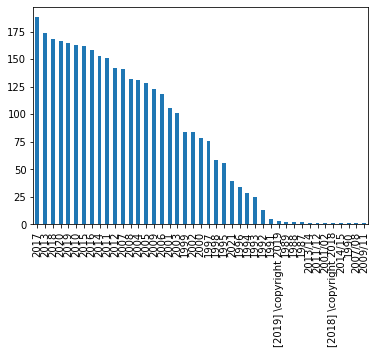

In [77]:
bib_df['year'].value_counts().plot(kind="bar")